In [114]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [30]:
df = pd.read_excel("AVH.xlsx")
print(df.head())

print(df.shape)

   Date/Time  Weekday        CDD  HDD    HDD-CDD  CHWton*hrs  ELECkWh  \
0 2020-07-01        4  22.372673  0.0 -22.372673         0.0      0.0   
1 2020-07-02        5  24.483854  0.0 -24.483854         0.0      0.0   
2 2020-07-06        2  27.820660  0.0 -27.820660         0.0      0.0   
3 2020-07-07        3  28.595104  0.0 -28.595104         0.0      0.0   
4 2020-07-08        4  30.337639  0.0 -30.337639         0.0      0.0   

   STEAMLB  CHWkBTU  ELECkBTU  STEAMkBTU  Day Type       TEMP  SUMkBTU  
0      0.0      0.0       0.0        0.0         0  77.372673      0.0  
1      0.0      0.0       0.0        0.0         0  79.483854      0.0  
2      0.0      0.0       0.0        0.0         0  82.820660      0.0  
3      0.0      0.0       0.0        0.0         0  83.595104      0.0  
4      0.0      0.0       0.0        0.0         0  85.337639      0.0  
(730, 14)


In [93]:
# Split dataset to weekday and weekend datasets
df_weekday = df[df["Weekday"] <= 5]
df_weekend = df[df["Weekday"] > 5]

# Split last 30 rows as test set for plotting purposes
df_weekday_test = df_weekday.iloc[-30:]
weekday_train_length = df_weekday.shape[0] - df_weekday_test.shape[0]
df_weekday_train = df_weekday.iloc[0:weekday_train_length]
df_weekend_test = df_weekend.iloc[-30:]
weekend_train_length = df_weekend.shape[0] - df_weekend_test.shape[0]
df_weekend_train = df_weekend.iloc[0:weekend_train_length]

print(df_weekday.shape)
print(df_weekend.shape)
print(df_weekday_train.shape)
print(df_weekday_test.shape)
print(df_weekend_train.shape)
print(df_weekend_test.shape)

(517, 14)
(213, 14)
(487, 14)
(30, 14)
(183, 14)
(30, 14)


In [94]:
# Define X and Y in a linear regression
X_weekday_train = df_weekday_train[["TEMP"]]
X_weekday_test = df_weekday_test[["TEMP"]]
X_weekend_train = df_weekend_train[["TEMP"]]
X_weekend_test = df_weekend_test[["TEMP"]]
Y_weekday_train = df_weekday_train[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]
Y_weekday_test = df_weekday_test[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]
Y_weekend_train = df_weekend_train[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]
Y_weekend_test = df_weekend_test[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]

Coefficient:  -250.27205787187185 , Intercept:  5809.864264328115
R^2:  -0.0336492533749746


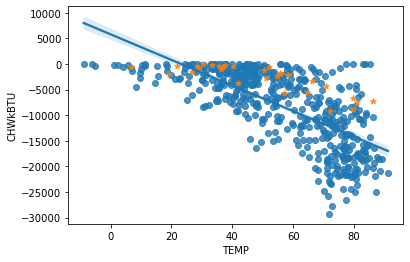

Coefficient:  -5.267448026612154 , Intercept:  6743.636965003566
R^2:  -95.1065273089743


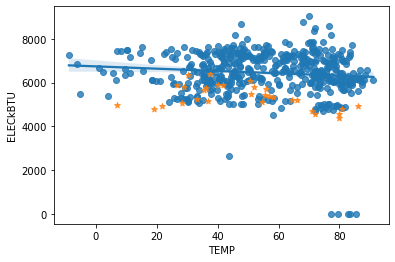

Coefficient:  -176.4846914475884 , Intercept:  18592.463137229817
R^2:  -0.2946828408538842


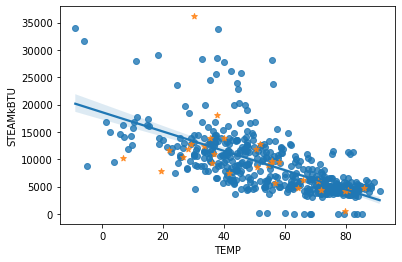

Coefficient:  -432.0241973460724 , Intercept:  31145.9643665615
R^2:  0.29095590841174024


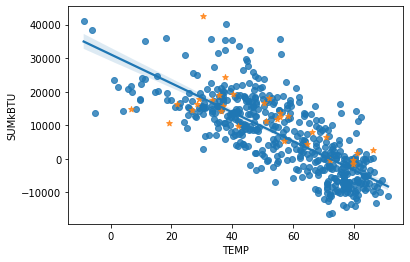

In [118]:
# Plot linear regression using for loop
max_r = 4

for i in range(max_r):
    lr = LinearRegression()
    lr.fit(X_weekday_train,Y_weekday_train.iloc[:,i])
    print("Coefficient: ", lr.coef_[0],", Intercept: ", lr.intercept_)
    m = lr.coef_[0]
    b = lr.intercept_
    ypred = lr.predict(X_weekday_train)
    print("R^2: ", r2_score(ypred, Y_weekday_train.iloc[:,i]))
    sns.regplot(x=X_weekday_train, y=Y_weekday_train.iloc[:,i])
    sns.regplot(x=X_weekday_test, y=Y_weekday_test.iloc[:,i], marker='*', fit_reg=False)
    plt.show()

Coefficient:  -238.41912617930316 , Intercept:  5990.80522876574


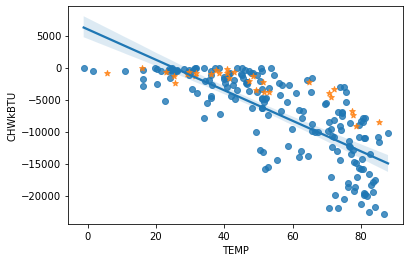

Coefficient:  0.5286196247548122 , Intercept:  5996.610549430218


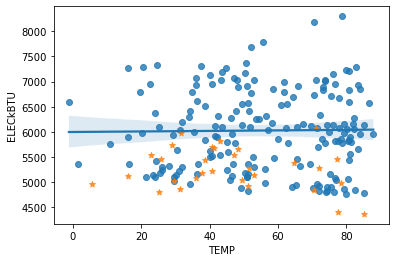

Coefficient:  -146.33220224648164 , Intercept:  16095.440673058438


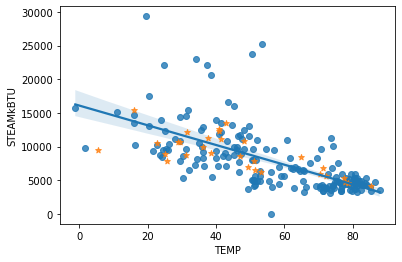

Coefficient:  -384.2227088010299 , Intercept:  28082.856451254393


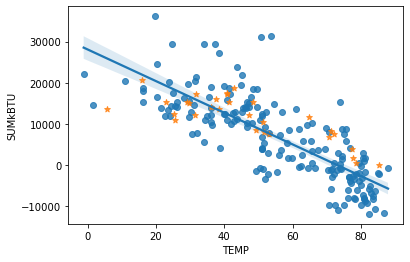

In [107]:
# Plot linear regression using for loop
for i in range(max_r):
    lr = LinearRegression()
    lr.fit(X_weekend_train,Y_weekend_train.iloc[:,i])
    print("Coefficient: ", lr.coef_[0],", Intercept: ", lr.intercept_)
    m = lr.coef_[0]
    b = lr.intercept_
    #plt.scatter(X_weekday,Y_weekday.iloc[:,i], color='green')
    sns.regplot(x=X_weekend_train, y=Y_weekend_train.iloc[:,i])
    sns.regplot(x=X_weekend_test, y=Y_weekend_test.iloc[:,i], marker='*', fit_reg=False)
    plt.show()